<a href="https://colab.research.google.com/github/rameshawasthi/Machine-Learning-and-AI/blob/main/Feature_Engineering_Missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML_AI/archive (1)/Reviews.csv', usecols=['ProductId','UserId','ProfileName','Score'])

Feature Engineering  -> Handling Missing Values
why are their missing values?
what are the different  types of Missing Data?
1.missing completely at random(MCAR):



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML_AI/DATASETS/tested.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df[df ['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


###missing data not at random(MNAR ): Systematic missing Values
There is absolute some relationship etween the data missing and any other values, observed or missing , within the dataset.

In [ ]:
import numpy as np
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)
#finding the percentage of null values
df['cabin_null'].mean()


0.7822966507177034

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [ ]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.823308
1    0.710526
Name: cabin_null, dtype: float64

###Misssing at Random(MAR)

##all the techniques of handling , missing values

1. Mean / Median/ Mode replacement
2.random sample Imputation
3.Capturing NAN values with a new feature
4.End of Distribution imputation
5.Arbitrary imputation
6.Frequent categories imputation

1. Mean/median/ mode
has the assumption that the data are missing completly at random(MCAR).
solve this by replacing the NAN with the most frequent occurance of the variables.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML_AI/DATASETS/tested.csv", usecols=['Age','Fare','Survived'])

In [ ]:
df

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875
...,...,...,...
413,0,NaN,8.0500
414,1,39.0,108.9000
415,0,38.5,7.2500
416,0,NaN,8.0500


In [ ]:
def impute_nan(df,variable,median):
  df[variable+ "_median"] = df[variable].fillna(median)

In [ ]:
median = df.Age.median()
median

27.0

In [ ]:
impute_nan(df,'Age', median)
df.head()

,Survived,Age,Fare,Age_median
0,0,34.5,7.8292,34.5
1,1,47.0,7.0000,47.0
2,0,62.0,9.6875,62.0
3,0,27.0,8.6625,27.0
4,1,22.0,12.2875,22.0


In [ ]:
print(df["Age"].std())
print(df["Age_median"].std())

14.181209235624422
12.70376984633328


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

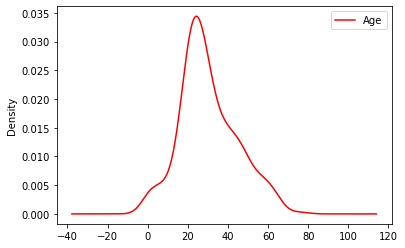

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = "kde", ax=ax, color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc="best")


Advantages And Disadvantages of Mean/Median Imputation
Advantages

    Easy to implement(Robust to outliers)
    Faster way to obtain the complete dataset

Disadvantages

    Change or Distortion in the original variance
    Impacts Correlation

